<a href="https://colab.research.google.com/github/Prasad-Khedkar/TED-Talk-Views-Prediction/blob/main/TED_Talk_Views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Description** **:** 

### TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages. Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates. The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

## **Steps Taken :**

* Importing Libraries
* Data Loading 
* Data Cleaning
* EDA and Visualization
* Data pre-processing
* Feature Engineering
* Model Implementation
* Model Selection

## **Importing Libraries**

In [1]:
import numpy as np                                                               ## Linear Algebra
import pandas as pd                                                              ## Framing data
import matplotlib.pyplot as plt                                                  ## Visualization
import seaborn as sns                                                            ## Visualization

from datetime import datetime

from sklearn.preprocessing import StandardScaler                                 

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')                                                ## To ignore warning messages
sns.set(style="darkgrid")

## **Data Loading**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/Projects/TED_Talk/Data/'

In [4]:
df0 = pd.read_csv(path + 'data_ted.csv',encoding='latin-1')

In [5]:
df = df0.copy()                                                                  ## creating deep copy 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [7]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the worldâ...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Roslingâs hands, data sings. Gl...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today â and I'm very happy th...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [8]:
print(list(df.columns))                                                          ## column list

['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'views', 'recorded_date', 'published_date', 'event', 'native_lang', 'available_lang', 'comments', 'duration', 'topics', 'related_talks', 'url', 'description', 'transcript']


In [9]:
df.shape

(4005, 19)

In [10]:
df.describe()                                                                    # Numerical attributes

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [11]:
df = df.set_index('talk_id')                                                     ## setting talk id as index column

## **Data Cleaning**

In [12]:
df.isnull().sum()                                                                ## Null Values count

title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [13]:
df.drop_duplicates(keep='first',inplace=True)                                    ## Dropping duplicate values and keeping the first record

In [14]:
df.shape                                                                         ## No duplicate values present

(4005, 18)

In [15]:
df = df.dropna(subset=['all_speakers' , 'occupations' , 'about_speakers' , 'recorded_date' , 'comments' ])         
                                                                                 ## Dropping null values rows
df.head()

,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
talk_id,,,,,,,,,,,,,,,,,,
1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the worldâ...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Roslingâs hands, data sings. Gl...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today â and I'm very happy th...
66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [16]:
df.isnull().sum()                                                                ## Re-checking the presence of null values in each column

title             0
speaker_1         0
all_speakers      0
occupations       0
about_speakers    0
views             0
recorded_date     0
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64

In [17]:
df.shape                                                                         ## Final shape of our data

(3338, 18)

## **EDA and Visualization**

### Distplot for 'views'

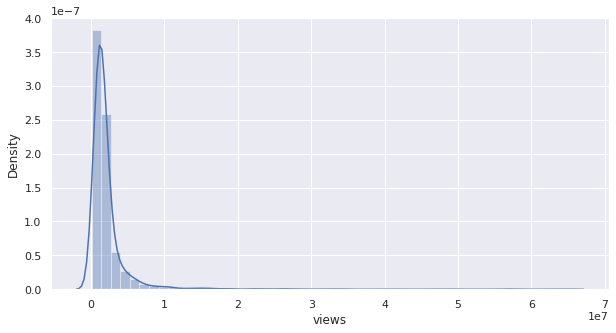

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(df['views'])                                                        ## Distplot of our dependent variable- 'views'
plt.show()                                                                       ## Distplot is positively skewed

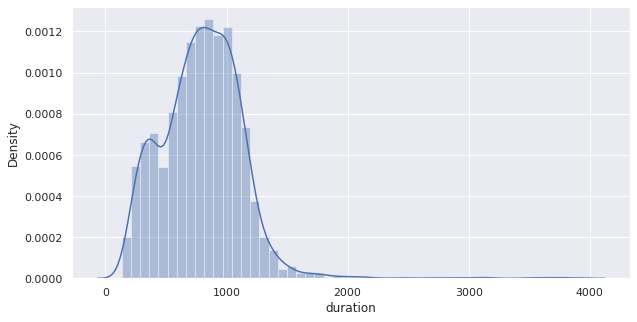

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(df['duration'])

### Distplot for 'comments'

(-100.0, 1800.0, 0.0, 0.005)

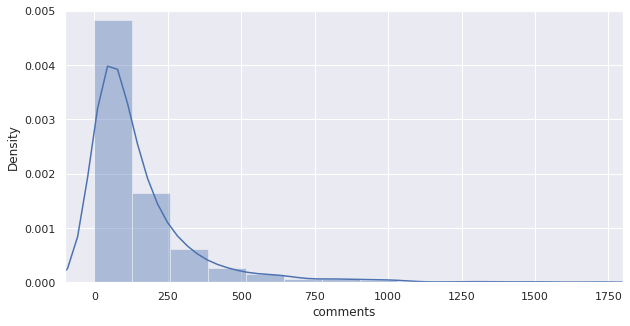

In [20]:
plt.figure(figsize=(10,5))
sns.distplot(df['comments'])                                                     ## Distplot is positively skewed
plt.axis([-100,1800,0,0.005])

# **Pre-processing of Data** (Adding new columns)





In [21]:
from datetime import datetime                                                    ## Importing datetime and calendar library
import calendar                                                                   
# Setting the Datetime formate:                                                  
today = datetime.now()                                                         
today.strftime('%Y-%m-%d')                                                       

'2022-12-12'

In [22]:
df['published_date']= pd.to_datetime(df['published_date'])                       ## Converting dtype of 'published_date' from 'object' to 'datetime64'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3338 entries, 1 to 62263
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3338 non-null   object        
 1   speaker_1       3338 non-null   object        
 2   all_speakers    3338 non-null   object        
 3   occupations     3338 non-null   object        
 4   about_speakers  3338 non-null   object        
 5   views           3338 non-null   int64         
 6   recorded_date   3338 non-null   object        
 7   published_date  3338 non-null   datetime64[ns]
 8   event           3338 non-null   object        
 9   native_lang     3338 non-null   object        
 10  available_lang  3338 non-null   object        
 11  comments        3338 non-null   float64       
 12  duration        3338 non-null   int64         
 13  topics          3338 non-null   object        
 14  related_talks   3338 non-null   object        
 15  url

In [23]:
df['published_year']=df['published_date'].dt.year                                ## Adding published_year and published_month columns
df['published_month']=df['published_date'].dt.month_name()
df.head()

,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,published_year,published_month
talk_id,,,,,,,,,,,,,,,,,,,,
1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the worldâ...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,June
92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Roslingâs hands, data sings. Gl...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2006,June
7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",2006,June
53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today â and I'm very happy th...,2006,June
66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,2006,June


In [24]:
last_publishing_date = df['published_date'].max()
last_publishing_date                                                             ## Last published date 

Timestamp('2020-04-28 00:00:00')

In [25]:
## Calculating total time elapsed during 'last pubishing date' and the TED talk published date 

df['time_since_published'] = last_publishing_date - pd.DatetimeIndex(df['published_date'])

In [26]:
df['daily_views'] = df['views'] / ( df['time_since_published'].apply(lambda x : x.days) + 1 )
df['daily_views'] = df['daily_views'].astype('int64')                            ## converting 'daily_views' dtype to int64

In [27]:
df['daily_views'].describe()

count      3338.000000
mean       2625.750749
std       11223.928943
min          35.000000
25%         378.000000
50%         882.000000
75%        2000.000000
max      464414.000000
Name: daily_views, dtype: float64

In [28]:
df.head(2)

,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,...,duration,topics,related_talks,url,description,transcript,published_year,published_month,time_since_published,daily_views
talk_id,,,,,,,,,,,,,,,,,,,,,
1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the worldâ...,3523392,2006-02-25,2006-06-27,TED2006,en,...,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,June,5054 days,697
92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Roslingâs hands, data sings. Gl...",14501685,2006-02-22,2006-06-27,TED2006,en,...,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2006,June,5054 days,2868


### Distplot for 'daily_views'

(-10000.0, 90000.0, 0.0, 0.00018)

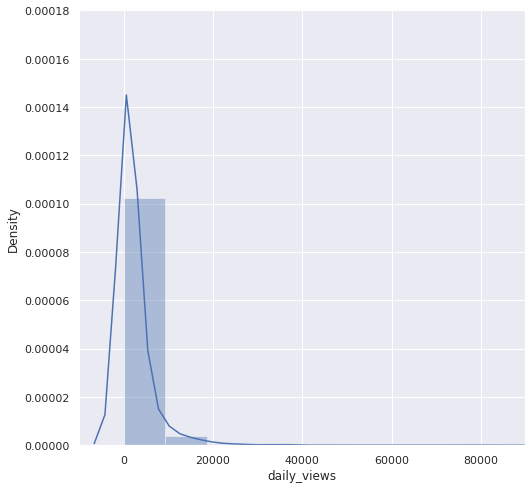

In [29]:
plt.figure(figsize = (8,8))                                             
sns.distplot(df['daily_views'])                                                  ## Distplot is positively skewed
plt.axis([-10000,90000,0,0.00018])

### Dividing variables into Numerical and Category type:

In [30]:
data_numerical= df[['views', 'duration','comments']]

data_categorical= df[['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'native_lang', 'available_lang', 'topics', 'related_talks', 'url', 'description', 'transcript']]

data_target_variable = df['views']

## Bi-variate Analysis

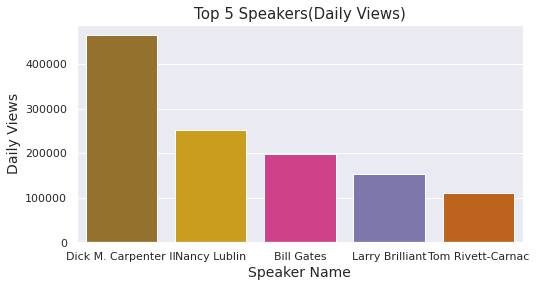

In [31]:
top_speakers=df.groupby(['speaker_1'],as_index=False)['daily_views'].sum().sort_values('daily_views',ascending=False)[:5]
                                                                                 ## Grouping speaker_1 column by their daily_views count in descending order
plt.figure(figsize=(8,4))
sns.barplot(x='speaker_1', y='daily_views',data=top_speakers,palette='Dark2_r')
plt.xlabel('Speaker Name',fontsize=14)
plt.ylabel('Daily Views',fontsize =14)
plt.title('Top 5 Speakers(Daily Views)',fontsize=15)
plt.show()

In [32]:
top_speakers.sample(5)

,speaker_1,daily_views
339,Bill Gates,198801
1942,Nancy Lublin,252434
735,Dick M. Carpenter II,464414
1560,Larry Brilliant,152556
2684,Tom Rivett-Carnac,110288


In [33]:
speaker_count = df['speaker_1'].value_counts()[:5]                               ##  Top 5 Speaker count
speaker_count

Hans Rosling     10
Juan Enriquez     9
Greg Gage         9
Dan Ariely        7
Marco Tempest     7
Name: speaker_1, dtype: int64

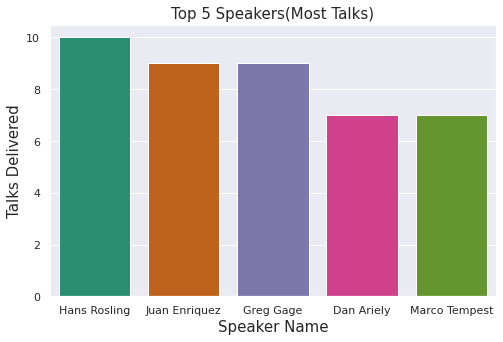

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x=speaker_count.index , y = speaker_count,palette='Dark2')
plt.xlabel('Speaker Name',fontsize=15)
plt.ylabel('Talks Delivered', fontsize=15)
plt.title('Top 5 Speakers(Most Talks)', fontsize=15)
plt.show()

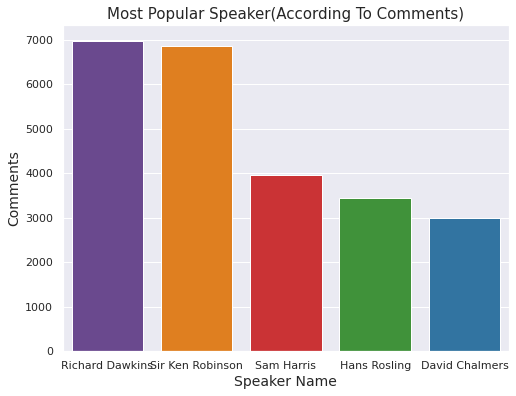

In [35]:
speaker_comments=df.groupby(['speaker_1'],as_index=False)['comments'].sum().sort_values('comments',ascending=False)[:5]
plt.figure(figsize=(8,6))
sns.barplot(x = 'speaker_1', y = 'comments' , data=speaker_comments, palette='Paired_r')
plt.xlabel('Speaker Name', fontsize=14)
plt.ylabel('Comments',fontsize= 14)
plt.title('Most Popular Speaker(According To Comments)', fontsize=15)
plt.show()

In [36]:
avg=df.groupby('speaker_1').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)


In [37]:
type(avg)

pandas.core.frame.DataFrame

In [38]:
avg_daily_views=df.groupby('speaker_1').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
avg_daily_views=avg_daily_views.to_dict()
avg_daily_views=avg_daily_views.values()
avg_daily_views =  list(avg_daily_views)[0]
df['speaker_avg_views']=df['speaker_1'].map(avg_daily_views)

In [39]:
df.head(4)

,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,...,topics,related_talks,url,description,transcript,published_year,published_month,time_since_published,daily_views,speaker_avg_views
talk_id,,,,,,,,,,,,,,,,,,,,,
1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the worldâ...,3523392,2006-02-25,2006-06-27,TED2006,en,...,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,June,5054 days,697,699.75
92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Roslingâs hands, data sings. Gl...",14501685,2006-02-22,2006-06-27,TED2006,en,...,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2006,June,5054 days,2868,1099.10
7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,...,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",2006,June,5054 days,379,687.75
53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,...,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today â and I'm very happy th...,2006,June,5054 days,527,453.00


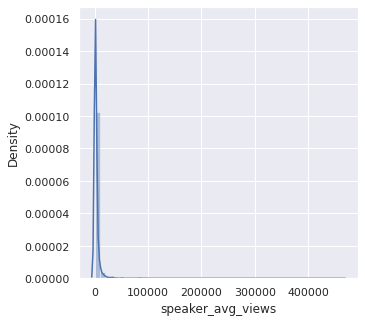

In [40]:
plt.figure(figsize = (5 , 5))
sns.distplot(df['speaker_avg_views'])                                            ## Plot is Positively Skewed
plt.show()

In [41]:
event=df.groupby('event').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
event=event.to_dict()
event=event.values()
event=  list(event)[0]
df['event_avg_views']=df['event'].map(event)

In [42]:
df.head(4)

,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,...,related_talks,url,description,transcript,published_year,published_month,time_since_published,daily_views,speaker_avg_views,event_avg_views
talk_id,,,,,,,,,,,,,,,,,,,,,
1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the worldâ...,3523392,2006-02-25,2006-06-27,TED2006,en,...,"{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,June,5054 days,697,699.75,782.47619
92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Roslingâs hands, data sings. Gl...",14501685,2006-02-22,2006-06-27,TED2006,en,...,"{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2006,June,5054 days,2868,1099.10,782.47619
7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,...,"{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",2006,June,5054 days,379,687.75,782.47619
53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,...,{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today â and I'm very happy th...,2006,June,5054 days,527,453.00,782.47619


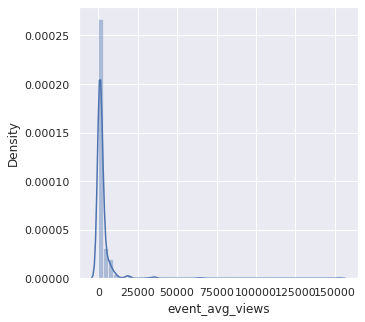

In [43]:
plt.figure(figsize=(5,5))
sns.distplot(df['event_avg_views'])                                              ## Plot is Positively Skewed
plt.show()

In [44]:
df.reset_index()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,related_talks,url,description,transcript,published_year,published_month,time_since_published,daily_views,speaker_avg_views,event_avg_views
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the worldâ...,3523392,2006-02-25,2006-06-27,TED2006,...,"{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,June,5054 days,697,699.750000,782.47619
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Roslingâs hands, data sings. Gl...",14501685,2006-02-22,2006-06-27,TED2006,...,"{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2006,June,5054 days,2868,1099.100000,782.47619
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,...,"{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",2006,June,5054 days,379,687.750000,782.47619
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,...,{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today â and I'm very happy th...,2006,June,5054 days,527,453.000000,782.47619
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,...,"{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,2006,June,5054 days,12868,6456.000000,782.47619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,62628,How to shift your mindset and choose your future,Tom Rivett-Carnac,{0: 'Tom Rivett-Carnac'},{0: ['political strategist']},{0: 'A political strategist focused on creatin...,772022,2020-04-22,2020-04-22,TED2020: The Prequel,...,{2480: 'The inside story of the Paris climate ...,https://www.ted.com/talks/tom_rivett_carnac_ho...,"When it comes to big life problems, we often s...",I never thought that I would be giving my TED ...,2020,April,6 days,110288,110288.000000,152519.25000
3334,62627,An ode to living on Earth,Oliver Jeffers,{0: 'Oliver Jeffers'},"{0: ['artist', 'storyteller']}","{0: 'With a style that crackles with wry wit, ...",672908,2020-04-22,2020-04-22,TED2020: The Prequel,...,{44696: 'You are not alone in your loneliness'...,https://www.ted.com/talks/oliver_jeffers_an_od...,If you had to explain to a newborn what it mea...,[Oliver Jeffers] [An ode to living on Earth] H...,2020,April,6 days,96129,96129.000000,152519.25000
3335,62748,A global pandemic calls for global solutions,Larry Brilliant,"{0: 'Larry Brilliant', 1: 'Chris Anderson'}","{0: ['epidemiologist', 'philanthropist'], 1: [...","{0: ""TED Prize winner Larry Brilliant has spen...",760969,2020-04-22,2020-04-24,TED2020: The Prequel,...,"{58: 'My wish: Help me stop pandemics', 61303:...",https://www.ted.com/talks/larry_brilliant_a_gl...,Examining the facts and figures of the coronav...,"Helen Walters: So, Chris, who's up first? Chri...",2020,April,4 days,152193

In [45]:
df['number_of_lang_avail'] = df['available_lang'].apply(lambda x: len(x))

In [46]:
df.head(4)

,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,...,url,description,transcript,published_year,published_month,time_since_published,daily_views,speaker_avg_views,event_avg_views,number_of_lang_avail
talk_id,,,,,,,,,,,,,,,,,,,,,
1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the worldâ...,3523392,2006-02-25,2006-06-27,TED2006,en,...,https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,June,5054 days,697,699.75,782.47619,270
92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Roslingâs hands, data sings. Gl...",14501685,2006-02-22,2006-06-27,TED2006,en,...,https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2006,June,5054 days,2868,1099.10,782.47619,303
7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,...,https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",2006,June,5054 days,379,687.75,782.47619,165
53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today â and I'm very happy th...,2006,June,5054 days,527,453.00,782.47619,219


(1.0, 400.0, 0.0, 0.015)

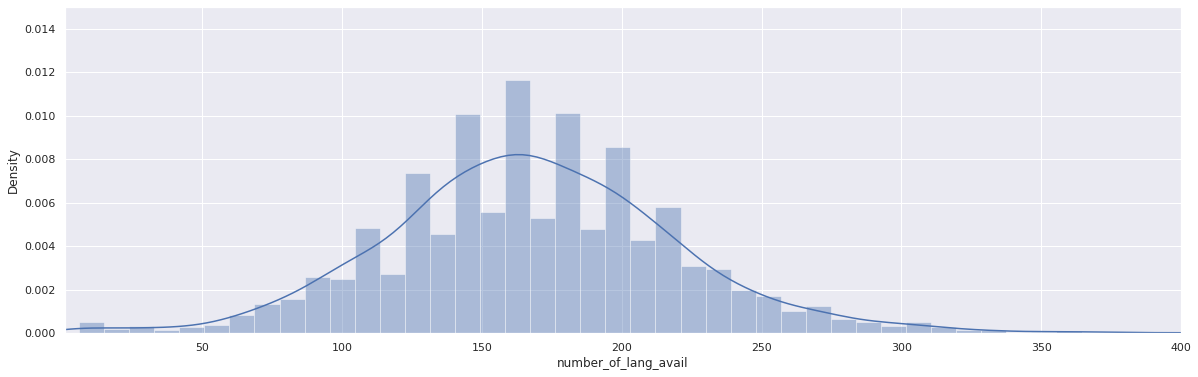

In [47]:
plt.figure(figsize=(20,6))
sns.distplot(df['number_of_lang_avail'])
plt.axis([1,400,0,0.015])

In [48]:
df1=pd.DataFrame(df.native_lang.value_counts())
df1

,native_lang
en,3306
es,15
fr,7
hi,2
de,1
pt,1
ko,1
zh-cn,1
ar,1
pt-br,1


In [49]:
df['topics'].head(10).to_frame()

,topics
talk_id,
1,"['alternative energy', 'cars', 'climate change..."
92,"['Africa', 'Asia', 'Google', 'demo', 'economic..."
7,"['computers', 'entertainment', 'interface desi..."
53,"['MacArthur grant', 'activism', 'business', 'c..."
66,"['children', 'creativity', 'culture', 'dance',..."
49,"['architecture', 'collaboration', 'culture', '..."
86,"['Christianity', 'God', 'atheism', 'comedy', '..."
94,"['God', 'atheism', 'brain', 'cognitive science..."
71,"['Christianity', 'God', 'culture', 'happiness'..."


In [50]:
df['Total_topics'] = df.topics.apply(lambda x: len(eval(x)))

In [51]:
df.head(4)

,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,...,description,transcript,published_year,published_month,time_since_published,daily_views,speaker_avg_views,event_avg_views,number_of_lang_avail,Total_topics
talk_id,,,,,,,,,,,,,,,,,,,,,
1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the worldâ...,3523392,2006-02-25,2006-06-27,TED2006,en,...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,June,5054 days,697,699.75,782.47619,270,9
92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Roslingâs hands, data sings. Gl...",14501685,2006-02-22,2006-06-27,TED2006,en,...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2006,June,5054 days,2868,1099.10,782.47619,303,11
7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",2006,June,5054 days,379,687.75,782.47619,165,9
53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,...,"In an emotionally charged talk, MacArthur-winn...",If you're here today â and I'm very happy th...,2006,June,5054 days,527,453.00,782.47619,219,9


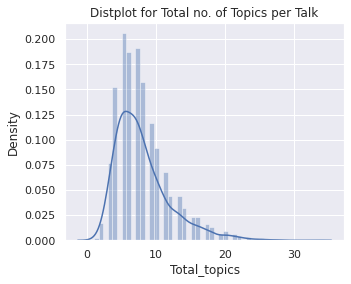

In [52]:
plt.figure( figsize = (5 , 4))
sns.distplot(df['Total_topics'])
plt.title("Distplot for Total no. of Topics per Talk")                           ## Plot is Positively Skewed
plt.show()

In [53]:
df[['topics' , 'daily_views']].head()

,topics,daily_views
talk_id,,
1,"['alternative energy', 'cars', 'climate change...",697
92,"['Africa', 'Asia', 'Google', 'demo', 'economic...",2868
7,"['computers', 'entertainment', 'interface desi...",379
53,"['MacArthur grant', 'activism', 'business', 'c...",527
66,"['children', 'creativity', 'culture', 'dance',...",12868


# Removing Outliers

In [54]:
df_numeric = df[list(df.describe())]
df_numeric.head()

,views,comments,duration,published_year,time_since_published,daily_views,speaker_avg_views,event_avg_views,number_of_lang_avail,Total_topics
talk_id,,,,,,,,,,
1,3523392,272.0,977,2006,5054 days,697,699.75,782.47619,270,9
92,14501685,628.0,1190,2006,5054 days,2868,1099.10,782.47619,303,11
7,1920832,124.0,1286,2006,5054 days,379,687.75,782.47619,165,9
53,2664069,219.0,1116,2006,5054 days,527,453.00,782.47619,219,9
66,65051954,4931.0,1164,2006,5054 days,12868,6456.00,782.47619,387,7


In [55]:
df_numeric.columns

Index(['views', 'comments', 'duration', 'published_year',
       'time_since_published', 'daily_views', 'speaker_avg_views',
       'event_avg_views', 'number_of_lang_avail', 'Total_topics'],
      dtype='object')

## Removing Outliers from 'duration' column 

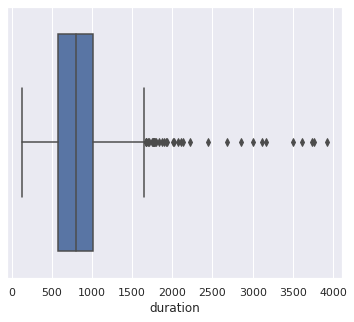

In [56]:
plt.figure( figsize = (6, 5))
sns.boxplot(df['duration'])
plt.show()

In [57]:
df_duration_iqr=  df['duration'].quantile(0.75)-df['duration'].quantile(0.25)
df['duration']= df['duration'].mask(df['duration']>(df['duration'].quantile(0.75)+1.5*df_duration_iqr), df['duration'].mean())

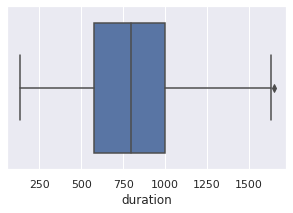

In [58]:
plt.figure( figsize = (5, 3))
sns.boxplot(df['duration'])
plt.show()

## Removing Outliers from 'number_of_lang_avail'

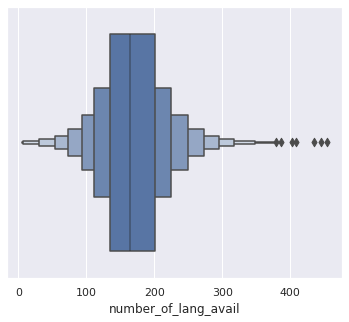

In [59]:
plt.figure( figsize = (6, 5))
sns.boxenplot(df['number_of_lang_avail'])
plt.show()

In [60]:
df_avail_lang_iqr=  df['number_of_lang_avail'].quantile(0.75)-df['number_of_lang_avail'].quantile(0.25)
df['number_of_lang_avail']= df['number_of_lang_avail'].mask(df['number_of_lang_avail']>(df['number_of_lang_avail'].quantile(0.75)+1.5*df_avail_lang_iqr), df['number_of_lang_avail'].mean())

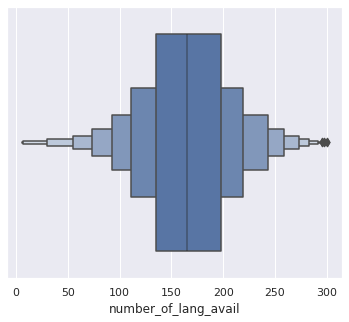

In [61]:
plt.figure( figsize = (6, 5))
sns.boxenplot(df['number_of_lang_avail'])
plt.show()

## Co-Relation

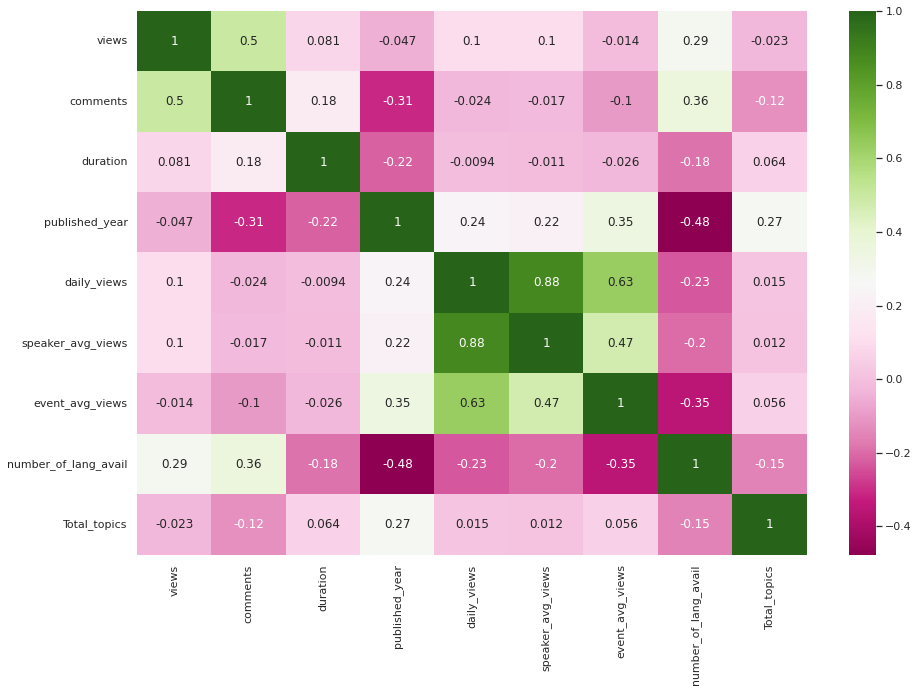

In [62]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot= True, cmap= "PiYG")

### We can see, our dependent var. 'daily_views' is highly co-related to two features -
#### 1)'speaker_avg_views' 
#### 2)'event_avg_views' 

##### Removing Unwanted Columns

In [63]:
unwanted_features=[ 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date','published_month', 'event',
       'native_lang', 'available_lang', 'topics',
       'related_talks', 'url', 'description', 'transcript']

In [64]:
df.head(4)

,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,...,description,transcript,published_year,published_month,time_since_published,daily_views,speaker_avg_views,event_avg_views,number_of_lang_avail,Total_topics
talk_id,,,,,,,,,,,,,,,,,,,,,
1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the worldâ...,3523392,2006-02-25,2006-06-27,TED2006,en,...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,June,5054 days,697,699.75,782.47619,270.000000,9
92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Roslingâs hands, data sings. Gl...",14501685,2006-02-22,2006-06-27,TED2006,en,...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2006,June,5054 days,2868,1099.10,782.47619,168.113841,11
7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",2006,June,5054 days,379,687.75,782.47619,165.000000,9
53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,...,"In an emotionally charged talk, MacArthur-winn...",If you're here today â and I'm very happy th...,2006,June,5054 days,527,453.00,782.47619,219.000000,9


In [65]:
df.drop(columns=unwanted_features,inplace=True)


In [66]:
df.head(4)

,comments,duration,published_year,time_since_published,daily_views,speaker_avg_views,event_avg_views,number_of_lang_avail,Total_topics
talk_id,,,,,,,,,
1,272.0,977.0,2006,5054 days,697,699.75,782.47619,270.000000,9
92,628.0,1190.0,2006,5054 days,2868,1099.10,782.47619,168.113841,11
7,124.0,1286.0,2006,5054 days,379,687.75,782.47619,165.000000,9
53,219.0,1116.0,2006,5054 days,527,453.00,782.47619,219.000000,9


### Re-checking heatmap after removing unwanted features from dataset

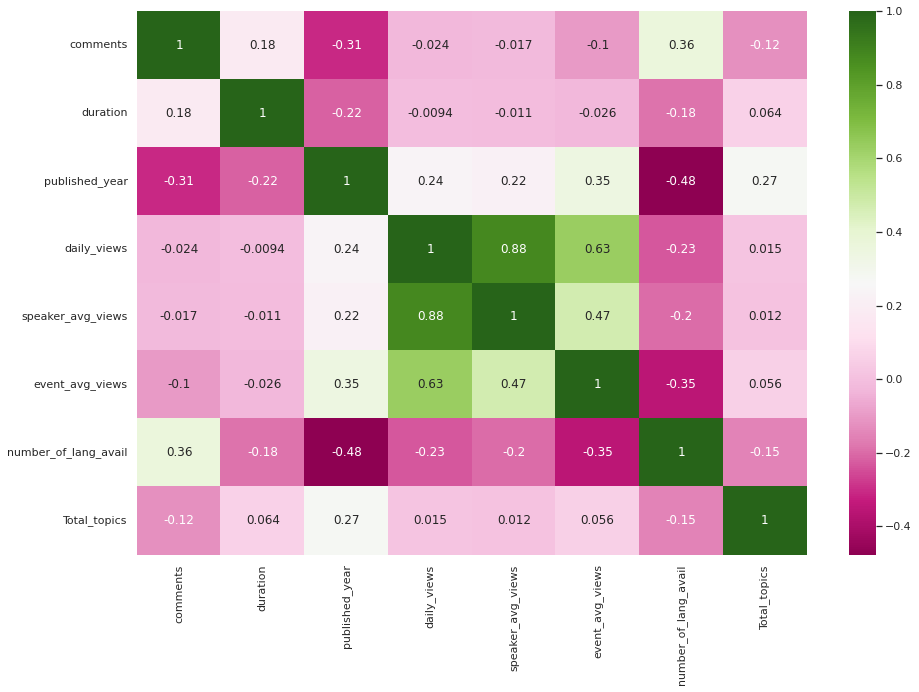

In [67]:
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot= True, cmap= "PiYG")

In [68]:
dep_var =df['daily_views']                                                                                                     ## Dependent variable
ind_var =df[['duration', 'speaker_avg_views', 'event_avg_views','number_of_lang_avail', 'Total_topics', 'published_year']]     ## Independent Variables

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
## Splitting Data - 70% Training set & 30% Test set
X_train , X_test , y_train , y_test = train_test_split(ind_var , dep_var ,test_size = 0.3 , random_state = 1)

In [71]:
scaler = StandardScaler()                                                        ## Standardizing Features in one scale
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
from sklearn.model_selection import cross_validate                               ## For cross-validation(10-fold)

In [73]:
pd.set_option('display.float_format',lambda x: '%.2f' %x)                        ## Preferring decimal format over exponential in pandas dataframe

# **Different Model Implementations**

## Linear Regression
### (Good Performer)

In [74]:
## Creating a Regressor Object
lr=LinearRegression()

In [75]:
## 10-fold cross validation
lr_score = cross_validate(lr,X_train,y_train,cv=10,scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'],return_train_score=True)

In [76]:
lr_df = pd.DataFrame(lr_score)                                                   ## Putting Scores in Pandas Dataframe
lr_df = lr_df.rename(columns={'test_neg_root_mean_squared_error':'Test_RMSE',
                     'train_neg_root_mean_squared_error':'Train_RMSE',
                     'test_neg_mean_absolute_error':'Test_MAE',
                     'train_neg_mean_absolute_error':'Train_MAE',
                            'test_r2':'Test_R2','train_r2':'Train_R2'})
lr_df.drop(columns=['fit_time','score_time'],inplace=True)                       ## Dropping un-necessary columns

In [77]:
lr_df                                                                            ## Scores of 10-fold Train-Test Splits

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
0,0.80,0.71,-13545.52,-4490.40,-1789.12,-1233.52
1,0.75,0.87,-8468.76,-4357.30,-1281.61,-1009.40
2,-0.04,0.87,-4346.34,-4763.13,-1383.40,-1295.08
3,0.80,0.86,-3692.55,-4837.72,-1267.46,-1395.12
4,-1.03,0.88,-5668.56,-4612.31,-1493.72,-1292.37
5,0.63,0.86,-2559.90,-4905.98,-1124.55,-1369.20
6,0.72,0.86,-3252.92,-4857.85,-1310.22,-1321.03
7,0.61,0.86,-3279.66,-4856.78,-1153.20,-1364.45
8,0.79,0.86,-1778.93,-4938.84,-959.02,-1357.08
9,0.40,0.90,-9365.94,-3908.20,-2013.68,-1124.01


In [78]:
LR = lr_df.drop(index={0,1,2,4,5,6,7,8,9})                                       ## Dropping rows, having poor scores
LR.rename(index={3:'Simple Linear'},inplace = True)

In [79]:
LR                                                                               ## Good score

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
Simple Linear,0.80,0.86,-3692.55,-4837.72,-1267.46,-1395.12


## Lasso Regression
### (Good Performer)

In [80]:
## Creating a Regressor Object
ls=Lasso(alpha=200)

In [81]:
## 10-fold cross validation
ls_score = cross_validate(ls,X_train,y_train,cv=10,scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'],return_train_score=True)

In [82]:
ls_df = pd.DataFrame(ls_score)                                                   ## Putting scores in Pandas Dataframe
ls_df = ls_df.rename(columns={'test_neg_root_mean_squared_error':'Test_RMSE',
                     'train_neg_root_mean_squared_error':'Train_RMSE',
                     'test_neg_mean_absolute_error':'Test_MAE',
                     'train_neg_mean_absolute_error':'Train_MAE',
                            'test_r2':'Test_R2','train_r2':'Train_R2'})
ls_df.drop(columns=['fit_time','score_time'],inplace=True)                       ## Dropping un-necessary columns

In [83]:
ls_df                                                                            ## Scores of 10-fold Train-Test Splits

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
0,0.73,0.71,-15712.28,-4524.10,-1936.00,-1247.65
1,0.72,0.87,-8863.71,-4369.46,-1251.96,-955.34
2,0.02,0.87,-4205.09,-4780.38,-1319.85,-1241.74
3,0.83,0.86,-3412.01,-4855.09,-1201.25,-1350.74
4,-0.93,0.88,-5534.10,-4631.34,-1424.18,-1256.39
5,0.68,0.86,-2387.67,-4921.93,-1070.82,-1333.02
6,0.75,0.86,-3123.13,-4874.55,-1284.06,-1285.75
7,0.65,0.86,-3101.02,-4873.77,-1114.08,-1323.61
8,0.80,0.86,-1720.20,-4954.24,-938.72,-1326.80
9,0.40,0.90,-9412.88,-3931.72,-1990.45,-1090.65


In [84]:
LS = ls_df.drop(index={0,1,2,4,5,6,7,8,9})                                       ## Dropping rows, having poor scores
LS.rename(index={3:'Lasso'},inplace = True)                                      

In [85]:
LS                                                                               ## Good Score

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
Lasso,0.83,0.86,-3412.01,-4855.09,-1201.25,-1350.74


## Ridge Regression
###(Good Performer)

In [86]:
## Creating a Regression Object
rd=Ridge(alpha=150)

In [87]:
## 10-fold cross validation
rd_score = cross_validate(rd,X_train,y_train,cv=10,scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'],return_train_score=True)

In [88]:
rd_df = pd.DataFrame(rd_score)                                                   ## Putting scores in Pandas Dataframe
rd_df = rd_df.rename(columns={'test_neg_root_mean_squared_error':'Test_RMSE',
                     'train_neg_root_mean_squared_error':'Train_RMSE',
                     'test_neg_mean_absolute_error':'Test_MAE',
                     'train_neg_mean_absolute_error':'Train_MAE',
                            'test_r2':'Test_R2','train_r2':'Train_R2'})
rd_df.drop(columns=['fit_time','score_time'],inplace=True)                       ## Dropping un-necessary columns

In [89]:
rd_df                                                                            ## Scores of 10-fold Train-Test Splits

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
0,0.70,0.71,-16671.01,-4536.08,-1960.01,-1200.50
1,0.73,0.86,-8730.57,-4405.40,-1272.85,-986.04
2,0.08,0.87,-4079.28,-4809.42,-1278.36,-1213.56
3,0.83,0.86,-3400.79,-4883.25,-1143.85,-1307.40
4,-0.80,0.87,-5332.47,-4661.70,-1379.22,-1215.29
5,0.67,0.86,-2427.25,-4948.93,-1034.24,-1289.55
6,0.75,0.86,-3095.87,-4902.20,-1220.95,-1243.60
7,0.66,0.86,-3053.35,-4901.50,-1067.65,-1282.26
8,0.81,0.86,-1673.66,-4981.44,-875.22,-1283.55
9,0.42,0.90,-9259.09,-3966.19,-1915.97,-1056.20


In [90]:
RD = rd_df.drop(index={0,1,2,4,5,6,7,8,9})                                       ## Dropping rows, having poor scores    
RD.rename(index={3:'Ridge'},inplace = True)

In [91]:
RD                                                                               ## Good Score

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
Ridge,0.83,0.86,-3400.79,-4883.25,-1143.85,-1307.40


## DecisionTreeRegressor
### (Overfitting)

In [92]:
dt=DecisionTreeRegressor()

In [93]:
## 10-fold cross validation
dt_score = cross_validate(dt,X_train,y_train,cv=10,scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'],return_train_score=True)

In [94]:
dt_df = pd.DataFrame(dt_score)
dt_df = dt_df.rename(columns={'test_neg_root_mean_squared_error':'Test_RMSE',
                     'train_neg_root_mean_squared_error':'Train_RMSE',
                     'test_neg_mean_absolute_error':'Test_MAE',
                     'train_neg_mean_absolute_error':'Train_MAE',
                            'test_r2':'Test_R2','train_r2':'Train_R2'})
dt_df.drop(columns=['fit_time','score_time'],inplace=True)

In [95]:
dt_df

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
0,0.29,1.00,-25615.39,-0.00,-2302.46,-0.00
1,0.51,1.00,-11877.83,-0.00,-1320.44,-0.00
2,0.63,1.00,-2571.40,-0.00,-735.23,-0.00
3,0.92,1.00,-2278.18,-0.00,-594.01,-0.00
4,0.62,1.00,-2437.29,-0.00,-666.07,-0.00
5,0.85,1.00,-1645.96,-0.00,-466.90,-0.00
6,0.75,1.00,-3090.52,-0.00,-704.39,-0.00
7,0.77,1.00,-2511.34,-0.00,-687.51,-0.00
8,0.74,1.00,-1950.19,-0.00,-527.46,-0.00
9,0.42,1.00,-9228.00,-0.00,-1126.48,-0.00


**Pure-overfitting, hence rejecting**

## SVR
###(Horrible!)

In [96]:
sv = SVR(kernel = 'rbf')

In [97]:
## 10-fold cross validation
sv_score = cross_validate(sv,X_train,y_train,cv=10,scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'],return_train_score=True)

In [98]:
sv_df = pd.DataFrame(sv_score)
sv_df = sv_df.rename(columns={'test_neg_root_mean_squared_error':'Test_RMSE',
                     'train_neg_root_mean_squared_error':'Train_RMSE',
                     'test_neg_mean_absolute_error':'Test_MAE',
                     'train_neg_mean_absolute_error':'Train_MAE',
                            'test_r2':'Test_R2','train_r2':'Train_R2'})
sv_df.drop(columns=['fit_time','score_time'],inplace=True)

In [99]:
sv_df

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
0,-0.01,-0.03,-30557.55,-8519.25,-3512.80,-2061.48
1,-0.02,-0.02,-17038.43,-12010.98,-2655.84,-2157.99
2,-0.08,-0.02,-4430.31,-13205.06,-1830.80,-2247.71
3,-0.05,-0.02,-8362.74,-12992.01,-2337.54,-2192.14
4,-0.12,-0.02,-4204.78,-13212.86,-1959.15,-2233.99
5,-0.06,-0.02,-4315.25,-13208.85,-1594.98,-2275.02
6,-0.06,-0.02,-6366.88,-13116.29,-2023.98,-2227.57
7,-0.03,-0.02,-5306.47,-13163.19,-1593.67,-2275.33
8,-0.09,-0.02,-4027.61,-13217.49,-1763.02,-2256.80
9,-0.03,-0.02,-12334.41,-12632.72,-2803.68,-2140.75


**Extremely poor performance, hence rejecting**

## KNN
###(Average Performer)

In [100]:
## Creating a Regressor Object
knn= KNeighborsRegressor()

In [101]:
## 10-fold cross validation
knn_score = cross_validate(knn,X_train,y_train,cv=10,scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'],return_train_score=True)

In [102]:
knn_df = pd.DataFrame(knn_score)
knn_df = knn_df.rename(columns={'test_neg_root_mean_squared_error':'Test_RMSE',
                     'train_neg_root_mean_squared_error':'Train_RMSE',
                     'test_neg_mean_absolute_error':'Test_MAE',
                     'train_neg_mean_absolute_error':'Train_MAE',
                            'test_r2':'Test_R2','train_r2':'Train_R2'})
knn_df.drop(columns=['fit_time','score_time'],inplace=True)

In [103]:
knn_df

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
0,0.16,0.75,-27848.14,-4165.71,-2692.73,-842.12
1,0.55,0.53,-11282.74,-8130.56,-1524.38,-954.62
2,0.68,0.55,-2405.64,-8797.21,-966.77,-1021.67
3,0.77,0.55,-3884.52,-8660.59,-996.86,-1001.09
4,0.79,0.57,-1816.30,-8567.51,-781.68,-1017.48
5,0.68,0.55,-2361.66,-8797.30,-741.65,-1034.57
6,0.73,0.54,-3220.24,-8820.15,-1006.96,-1012.29
7,0.76,0.57,-2546.58,-8602.48,-928.35,-1003.71
8,0.77,0.55,-1840.10,-8799.53,-877.53,-1028.57
9,0.53,0.58,-8340.96,-8166.18,-1508.21,-924.05


**Average Peformance, hence rejecting**

## ExtraTreeRegressor
### (Overfitting)

In [104]:
et= ExtraTreeRegressor()

In [105]:
## 10-fold cross validation
et_score = cross_validate(et,X_train,y_train,cv=10,scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'],return_train_score=True)

In [106]:
et_df = pd.DataFrame(et_score)
et_df = et_df.rename(columns={'test_neg_root_mean_squared_error':'Test_RMSE',
                     'train_neg_root_mean_squared_error':'Train_RMSE',
                     'test_neg_mean_absolute_error':'Test_MAE',
                     'train_neg_mean_absolute_error':'Train_MAE',
                            'test_r2':'Test_R2','train_r2':'Train_R2'})
et_df.drop(columns=['fit_time','score_time'],inplace=True)

In [107]:
et_df

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
0,0.22,1.00,-26773.09,-0.00,-2662.71,-0.00
1,0.44,1.00,-12599.66,-0.00,-1368.15,-0.00
2,0.79,1.00,-1957.32,-0.00,-618.68,-0.00
3,0.78,1.00,-3800.76,-0.00,-818.85,-0.00
4,0.68,1.00,-2246.09,-0.00,-651.64,-0.00
5,0.82,1.00,-1778.38,-0.00,-599.48,-0.00
6,0.85,1.00,-2362.62,-0.00,-655.67,-0.00
7,0.74,1.00,-2651.93,-0.00,-582.69,-0.00
8,-0.70,1.00,-5017.16,-0.00,-855.22,-0.00
9,0.46,1.00,-8876.44,-0.00,-1255.91,-0.00


**Pure-overfitting, hence rejecting**

## Gradient Boosting
###(Overfitting)

In [108]:
## Creating a Regressor object
gbr=GradientBoostingRegressor(random_state=25)                                   

In [109]:
## 10-fold cross validation
gbr_score = cross_validate(gbr,X_train,y_train,cv=10,scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'],return_train_score=True)

In [110]:
gbr_df = pd.DataFrame(gbr_score)
gbr_df = gbr_df.rename(columns={'test_neg_root_mean_squared_error':'Test_RMSE',
                     'train_neg_root_mean_squared_error':'Train_RMSE',
                     'test_neg_mean_absolute_error':'Test_MAE',
                     'train_neg_mean_absolute_error':'Train_MAE',
                            'test_r2':'Test_R2','train_r2':'Train_R2'})
gbr_df = gbr_df.drop(columns=['fit_time','score_time'])

In [111]:
gbr_df

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
0,0.10,0.99,-28778.61,-791.37,-2937.31,-361.07
1,0.59,0.99,-10822.70,-845.26,-1194.18,-375.43
2,0.85,1.00,-1674.04,-903.31,-591.36,-376.40
3,0.83,1.00,-3348.13,-820.29,-705.74,-362.59
4,0.64,1.00,-2396.36,-884.18,-648.88,-381.36
5,0.92,1.00,-1221.63,-908.07,-469.42,-392.57
6,0.64,1.00,-3695.52,-914.40,-799.39,-389.33
7,0.65,1.00,-3074.86,-904.30,-618.06,-388.09
8,0.91,1.00,-1185.69,-899.63,-473.09,-388.99
9,0.51,1.00,-8504.37,-774.73,-1163.25,-341.48


**Pure-overfitting, hence rejecting**



## XGboost
### (Overfitting)

In [112]:
## Creating a Regessor Object
xg = XGBRegressor(silent = True )                             

In [113]:
## 10-fold cross validation
xg_score = cross_validate(xg,X_train,y_train,cv=10,scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'],return_train_score=True)

In [114]:
xg_df = pd.DataFrame(xg_score)
xg_df = xg_df.rename(columns={'test_neg_root_mean_squared_error':'Test_RMSE',
                     'train_neg_root_mean_squared_error':'Train_RMSE',
                     'test_neg_mean_absolute_error':'Test_MAE',
                     'train_neg_mean_absolute_error':'Train_MAE',
                            'test_r2':'Test_R2','train_r2':'Train_R2'})
xg_df = xg_df.drop(columns=['fit_time','score_time'])

In [115]:
xg_df

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
0,0.16,0.98,-27863.14,-1070.51,-2736.10,-446.39
1,0.58,0.98,-11012.86,-1458.44,-1251.01,-485.56
2,0.81,0.99,-1873.04,-1388.62,-695.57,-493.01
3,0.80,0.99,-3627.72,-1335.83,-823.33,-496.17
4,-4.58,0.99,-9395.80,-1398.03,-1248.83,-507.74
5,0.81,0.99,-1841.52,-1390.29,-604.13,-518.55
6,0.70,0.99,-3415.56,-1378.19,-862.90,-511.01
7,0.85,0.99,-2021.18,-1383.67,-598.05,-507.24
8,0.89,0.99,-1271.49,-1481.36,-543.51,-515.89
9,0.47,0.99,-8807.47,-1092.65,-1254.70,-445.89


**Pure-overfitting, hence rejecting**

## Random Forest
### (Best Performer)

In [116]:
## Creating a Regressor Object
rf=RandomForestRegressor(n_estimators = 100 , criterion = 'mse',random_state=999)     

In [117]:
## 10-fold cross validation
rf_score = cross_validate(rf,X_train,y_train,cv=10,scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'],return_train_score=True)

In [118]:
rf_df = pd.DataFrame(rf_score)                                                   ## Putting scoes in Pandas Dataframe
rf_df = rf_df.rename(columns={'test_neg_root_mean_squared_error':'Test_RMSE',
                     'train_neg_root_mean_squared_error':'Train_RMSE',
                     'test_neg_mean_absolute_error':'Test_MAE',
                     'train_neg_mean_absolute_error':'Train_MAE',
                            'test_r2':'Test_R2','train_r2':'Train_R2'})
rf_df = rf_df.drop(columns=['fit_time','score_time'])                            ## Dropping un-necessary columns 

In [119]:
rf_df                                                                            ## Scores of 10-fold Train-Test Splits

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
0,0.23,0.95,-26702.54,-1946.43,-2499.69,-254.67
1,0.50,0.88,-12008.28,-4120.77,-1260.41,-316.98
2,0.56,0.88,-2826.21,-4442.27,-676.29,-371.53
3,0.94,0.87,-1966.45,-4566.18,-469.91,-374.14
4,0.03,0.88,-3918.28,-4451.91,-679.22,-364.37
5,0.60,0.88,-2667.22,-4441.30,-565.67,-363.08
6,0.93,0.88,-1607.46,-4594.42,-493.93,-377.11
7,0.88,0.89,-1829.71,-4423.59,-501.81,-379.70
8,0.89,0.88,-1278.54,-4485.59,-445.31,-377.86
9,0.40,0.88,-9380.35,-4279.35,-1315.37,-325.64


In [120]:
RF = rf_df.drop(index={0,1,2,3,4,5,6,8,9})                                       ## Dropping rows, having low scores
RF.rename(index={7:'Random_Forest'},inplace = True)

In [121]:
RF                                                                               ## Best Score

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
Random_Forest,0.88,0.89,-1829.71,-4423.59,-501.81,-379.70


## Best Performing Models

In [122]:
Best_models = LR.append(LS).append(RD).append(RF)
Best_models

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
Simple Linear,0.80,0.86,-3692.55,-4837.72,-1267.46,-1395.12
Lasso,0.83,0.86,-3412.01,-4855.09,-1201.25,-1350.74
Ridge,0.83,0.86,-3400.79,-4883.25,-1143.85,-1307.40
Random_Forest,0.88,0.89,-1829.71,-4423.59,-501.81,-379.70


## **Hyperparameter Tuning**

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
ran = RandomForestRegressor()                                                    ## Just a base model

In [125]:
params = {'n_estimators':[10,20,30,50,100,150,200],
          'random_state':[0,1,5,10,15,20,55,99,100,999,9094]}

In [126]:
grid_model = GridSearchCV(ran, param_grid = params, scoring = 'r2', cv = 5)

In [127]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 20, 30, 50, 100, 150, 200],
                         'random_state': [0, 1, 5, 10, 15, 20, 55, 99, 100, 999,
                                          9094]},
             scoring='r2')

In [128]:
grid_model.best_params_                                                          ## Getting best hyper parameters

{'n_estimators': 10, 'random_state': 10}

In [129]:
ran_final = RandomForestRegressor(n_estimators = 10 , random_state = 10, criterion = 'mse')       ## Re-creating Regressor object with best hyperparameters

In [130]:
ran_score = cross_validate(ran_final,X_train,y_train,cv=10,scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'],return_train_score=True)

In [131]:
ran_df = pd.DataFrame(ran_score)                                                   ## Putting scoes in Pandas Dataframe
ran_df = ran_df.rename(columns={'test_neg_root_mean_squared_error':'Test_RMSE',
                     'train_neg_root_mean_squared_error':'Train_RMSE',
                     'test_neg_mean_absolute_error':'Test_MAE',
                     'train_neg_mean_absolute_error':'Train_MAE',
                            'test_r2':'Test_R2','train_r2':'Train_R2'})
ran_df = ran_df.drop(columns=['fit_time','score_time']) 

In [132]:
ran_df

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
0,0.22,0.94,-26847.42,-2133.25,-2457.96,-271.64
1,0.52,0.93,-11666.23,-3206.29,-1255.92,-320.10
2,-0.46,0.90,-5143.69,-4162.83,-850.29,-408.56
3,0.83,0.91,-3406.80,-3834.60,-707.40,-395.44
4,-0.80,0.92,-5338.15,-3647.11,-762.24,-370.97
5,0.56,0.93,-2774.74,-3411.38,-556.25,-344.05
6,0.87,0.93,-2268.47,-3519.52,-525.04,-330.51
7,0.94,0.93,-1282.85,-3349.21,-407.46,-331.37
8,0.89,0.93,-1272.03,-3414.26,-433.15,-342.16
9,0.43,0.94,-9179.58,-3077.70,-1184.02,-302.09


In [133]:
RAN = ran_df.drop(index={0,1,2,3,4,5,6,7,9})                                     ## Dropping rows, having low scores
RAN.rename(index={8:'Random_Forest_with_hyper_para'},inplace = True)
RAN

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
Random_Forest_with_hyper_para,0.89,0.93,-1272.03,-3414.26,-433.15,-342.16


In [134]:
RF_without = RF.rename(index={'Random_Forest':'Random_Forest_without_hyper_para'})     ## Final Result
RF_without.append(RAN)

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
Random_Forest_without_hyper_para,0.88,0.89,-1829.71,-4423.59,-501.81,-379.70
Random_Forest_with_hyper_para,0.89,0.93,-1272.03,-3414.26,-433.15,-342.16


## **Final Model Selection**

## Random Forest(with hyperparameter tuning) is our final model, because:-
  

*  ###  It has best Train-Test scores.
*  ###  Low RMSE and MAE errors on both Train and Test Dataset.

